In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime
from pandas_datareader import data as pdr
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Miral\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
today = datetime.now().date()
start_date = datetime(today.year-1 ,today.month ,today.day).date()
print(start_date)

2022-01-24


In [3]:
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}

In [4]:
for ticker in ticker_dist:
    filepath = "Resources/"+ ticker +".csv"
    #globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker] = pdr.get_data_yahoo(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].to_csv(filepath)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Here we can read all csv and store into different dataframe
for ticker in ticker_dist:
    filepath = "Resources/"+ ticker +".csv"
    globals()[ticker] = pd.read_csv(filepath, index_col=0)
    # globals()[ticker].index = pd.to_datetime(globals()[ticker].index)

In [6]:
Google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24 00:00:00-05:00,125.977997,131.203003,124.500000,130.804001,130.804001,76622000
2022-01-25 00:00:00-05:00,128.740005,129.399002,126.500504,126.934998,126.934998,46960000
2022-01-26 00:00:00-05:00,131.119003,133.000000,127.141998,129.233002,129.233002,49130000
2022-01-27 00:00:00-05:00,131.304001,132.652496,128.932495,129.005005,129.005005,31950000
2022-01-28 00:00:00-05:00,129.658997,133.356506,128.485001,133.350998,133.350998,34362000
...,...,...,...,...,...,...
2023-01-17 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001,91.290001,32602400
2023-01-18 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003,91.120003,29116700
2023-01-19 00:00:00-05:00,90.720001,93.610001,90.629997,93.050003,93.050003,37000400


In [7]:
# all ticker name list for labels graph comparision 
labels=[]
for ticker in ticker_dist:
    labels.append(ticker)

In [8]:
ticker_list = ["GOOGL","MSFT","TSLA","META","AAPL","AMZN","NFLX"]

In [9]:
df = yf.download(ticker_list, start=start_date, end=today,group_by="ticker") 

[*********************100%***********************]  7 of 7 completed


In [12]:
filepath= "Resources/merged_df.csv"
df.to_csv(filepath)

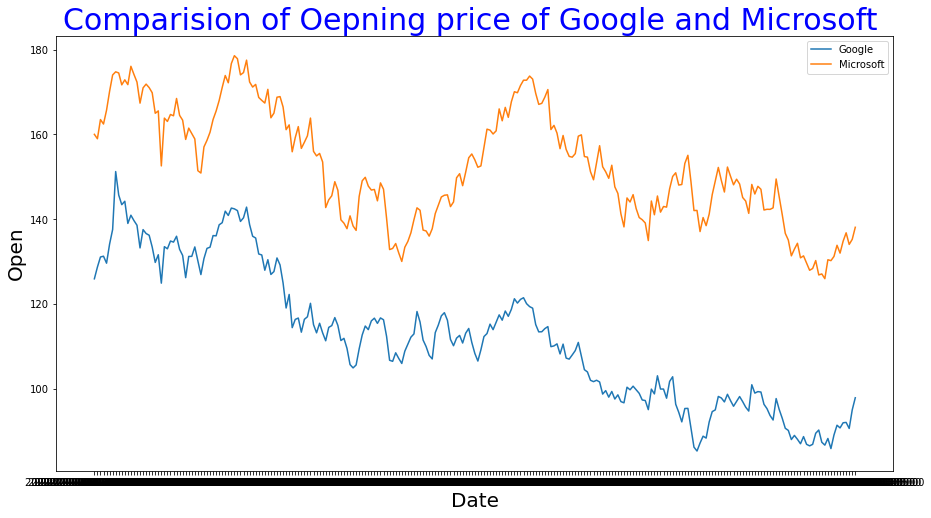

In [10]:
graph_label = [labels[0], labels[1]]
plt.figure(figsize=[15,8])
plt.plot(Google.index,Google["Open"],Apple.index,Apple["Open"])
plt.title(f"Comparision of Oepning price of {labels[0]} and {labels[1]} " , fontsize= 30 , color = "Blue")
plt.xlabel("Date", fontsize=20)
plt.ylabel("Open" , fontsize=20)
#plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

In [11]:
df.head()

AMZN                                      \
                                 Open        High         Low       Close   
Date                                                                        
2022-01-24 00:00:00-05:00  139.000000  144.945007  135.352005  144.544006   
2022-01-25 00:00:00-05:00  142.242493  143.600006  138.145004  139.985992   
2022-01-26 00:00:00-05:00  144.750000  145.184998  137.318497  138.872498   
2022-01-27 00:00:00-05:00  140.800003  144.243500  139.350006  139.637497   
2022-01-28 00:00:00-05:00  140.860504  143.998001  137.929504  143.977997   

                                                        META              \
                            Adj Close     Volume        Open        High   
Date                                                                       
2022-01-24 00:00:00-05:00  144.544006  155624000  297.839996  309.529999   
2022-01-25 00:00:00-05:00  139.985992   90824000  299.950012  306.230011   
2022-01-26 00:00:00-05:00  138.872498   95602000  307.010010  307.510010   
2022-01-27 00:00:00-05:00  139.637497   77516000  297.750000  301.709991   
2022-01-28 00:00:00-05:00  143.977997   74392000  295.619995  301.899994   

                                                   ...       GOOGL  \
                                  Low       Close  ...         Low   
Date                                               ...               
2022-01-24 00:00:00-05:00  289.010010  308.709991  ...  124.500000   
2022-01-25 00:00:00-05:00  297.579987  300.149994  ...  126.500504   
2022-01-26 00:00:00-05:00  290.850006  294.630005  ...  127.141998   
2022-01-27 00:00:00-05:00  294.260010  294.640015  ...  128.932495   
2022-01-28 00:00:00-05:00  293.029999  301.709991  ...  128.485001   

                                                                   MSFT  \
                                Close   Adj Close    Volume        Open   
Date                                                                      
2022-01-24 00:00:00-05:00  130.804001  130.804001  76622000  292.200012   
2022-01-25 00:00:00-05:00  126.934998  126.934998  46960000  291.519989   
2022-01-26 00:00:00-05:00  129.233002  129.233002  49130000  307.989990   
2022-01-27 00:00:00-05:00  129.005005  129.005005  31950000  302.660004   
2022-01-28 00:00:00-05:00  133.350998  133.350998  34362000  300.230011   

                                                                           \
                                 High         Low       Close   Adj Close   
Date                                                                        
2022-01-24 00:00:00-05:00  297.109985  276.049988  296.369995  293.618744   
2022-01-25 00:00:00-05:00  294.989990  285.170013  288.489990  285.811890   
2022-01-26 00:00:00-05:00  308.500000  293.029999  296.709991  293.955566   
2022-01-27 00:00:00-05:00  307.299988  297.929993  299.839996  297.056549   
2022-01-28 00:00:00-05:00  308.480011  294.450012  308.260010  305.398376   

                                     
                             Volume  
Date                                 
2022-01-24 00:00:00-05:00  85731500  
2022-01-25 00:00:00-05:00  72848600  
2022-01-26 00:00:00-05:00  90428900  
2022-01-27 00:00:00-05:00  53481300  
2022-01-28 00:00:00-05:00  49743700  

[5 rows x 42 columns]